# Visualization Technique
- Narrative
    - The other day, I was watching Connected, a scientific documentary on Netflix. While watching it, I have found that there is this thing called 'Benford's Law'. Benford's law is an observation about the frequency distribution of first-digits in many real-life sets of numerical data. In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time(https://en.wikipedia.org/wiki/Benford%27s_law). Benford's law also works in financial statements or tax return sheets. As a person who previously worked at an accounting firm as an external financial auditor, I was surprised that this was my first time hearing about such a law. I decided to check if this law actually applies to financial statements of various companies. I plan to use the line + marker plot to visually compare actual financial data gathered from Rapid API - Yahoo finance API and my own calculated set that follows Benford's law.


- About the Visualization
    - Why I should use a line plot?
        - A line plot is useful when there are certain trends in datasets, and you want to compare if those datasets follow each other's trends. Using a line plot could help me figure out how close the gathered data is aligned with the trend in Benford's law.
                
    - Why I should not use a line plot?
        - Using a line plot, it is hard to figure out how much two data points are apart from each other. Using a bar plot would be much better in terms of comparing lengths of two different data points.

# Demonstration

#### First, I am going to start off by importing usual suspects

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import math
import matplotlib.pyplot as plt

#### I have gathered financial data from Rapid API - Yahoo Finance API(https://rapidapi.com/apidojo/api/yahoo-finance1). I decided to choose four companies including Apple(AAPL), Google(GOOG), Tesla(TSLA), Microsoft(MSFT). I have downloaded the json files and loaded them with json library. Below are the codes I wrote to gather data from API

In [2]:
# 

# company = ""

# url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-financials"

# querystring = {"symbol":company,"region":"US"}

# headers = {
#     'x-rapidapi-key': "",
#     'x-rapidapi-host': ""
#     }

# response = requests.request("GET", url, headers=headers, params=querystring)

# with open('{}.json'.format(company), 'w') as f:
#     f.write(response.text)

In [3]:

with open('AAPL.json') as json_file:
    AAPL = json.load(json_file)

with open('GOOG.json') as json_file:
    GOOG = json.load(json_file)
    
with open('TSLA.json') as json_file:
    TSLA = json.load(json_file)
    
with open('MSFT.json') as json_file:
    MSFT = json.load(json_file)


#### Here's what it looks like

In [4]:
#AAPL

#### After json files are gathered, I have extracted financial statements(Cash Flow, Balance Sheet, Income Statement) from them.

In [5]:
# extracting CF from json file
def extractcashflow(json_data):
    CF_all = json_data['cashflowStatementHistory']['cashflowStatements']
    cfk = []
    for i in range(4):
        cfk.append(pd.Series(pd.DataFrame(CF_all[i]).T['raw'], name = 2019 - i))

    CF_4 = pd.concat(cfk,axis= 1)
    CF_4 = CF_4.fillna(0)
    return CF_4

In [6]:
extractcashflow(AAPL).head()

,2019,2018,2017,2016
investments,5335000000,58093000000,30845000000,-33542000000
changeToLiabilities,-1981000000,-2548000000,9172000000,8373000000
totalCashflowsFromInvestingActivities,-4289000000,45896000000,16066000000,-46446000000
netBorrowings,2499000000,-7819000000,432000000,29014000000
totalCashFromFinancingActivities,-86820000000,-90976000000,-87876000000,-17974000000


In [7]:
# extracting Balance Sheet from json file
def extractbalancesheet(json_data):
    BS_all = json_data['balanceSheetHistory']['balanceSheetStatements']
    bsk = []
    for i in range(4):
        bsk.append(pd.Series(pd.DataFrame(BS_all[i]).T['raw'], name = 2019 - i))

    BS_4 = pd.concat(bsk,axis= 1)
    BS_4 = BS_4.fillna(0)
    return BS_4

In [8]:
extractbalancesheet(AAPL).head()

,2019,2018,2017,2016
totalLiab,258549000000,248028000000,258578000000,241272000000
totalStockholderEquity,65339000000,90488000000,107147000000,134047000000
otherCurrentLiab,47867000000,43242000000,39293000000,38099000000
totalAssets,323888000000,338516000000,365725000000,375319000000
endDate,1601078400,1569628800,1538179200,1506729600


In [9]:
# extracting Income Statement from json file
def extractincomestatement(json_data):
    IS_all = json_data['incomeStatementHistory']['incomeStatementHistory']
    isk = []
    for i in range(4):
        isk.append(pd.Series(pd.DataFrame(IS_all[i]).T['raw'], name = 2019 - i))

    IS_4 = pd.concat(isk,axis= 1)
    IS_4 = IS_4.fillna(0)
    return IS_4

In [10]:
extractincomestatement(AAPL).head()

,2019,2018,2017,2016
researchDevelopment,18752000000,16217000000,14236000000,11581000000
effectOfAccountingCharges,0,0,0,0
incomeBeforeTax,67091000000,65737000000,72903000000,64089000000
minorityInterest,0,0,0,0
netIncome,57411000000,55256000000,59531000000,48351000000


#### Now I am going to concatenate all three of them.

In [11]:
def combinefs(json_data):
    return pd.concat([extractcashflow(json_data),extractbalancesheet(json_data),extractincomestatement(json_data)])

In [12]:
combinefs(AAPL)

,2019,2018,2017,2016
investments,5335000000,58093000000,30845000000,-33542000000
changeToLiabilities,-1981000000,-2548000000,9172000000,8373000000
totalCashflowsFromInvestingActivities,-4289000000,45896000000,16066000000,-46446000000
netBorrowings,2499000000,-7819000000,432000000,29014000000
totalCashFromFinancingActivities,-86820000000,-90976000000,-87876000000,-17974000000
...,...,...,...,...
totalOtherIncomeExpenseNet,803000000,1807000000,2005000000,2745000000
maxAge,1,1,1,1
discontinuedOperations,0,0,0,0
netIncomeFromContinuingOps,57411000000,55256000000,59531000000,48351000000


#### In order to conduct Benford's law test, you must extract the first-digit of every numerical data.

In [13]:
def extractfirstdigit(FS):
    FS_mode = FS.copy()
    for i in range(4):
        FS_mode[2019-i] = FS[2019-i].apply(lambda x : int(str(abs(x))[0]))
    return FS_mode

In [14]:
extractfirstdigit(combinefs(AAPL))

,2019,2018,2017,2016
investments,5,5,3,3
changeToLiabilities,1,2,9,8
totalCashflowsFromInvestingActivities,4,4,1,4
netBorrowings,2,7,4,2
totalCashFromFinancingActivities,8,9,8,1
...,...,...,...,...
totalOtherIncomeExpenseNet,8,1,2,2
maxAge,1,1,1,1
discontinuedOperations,0,0,0,0
netIncomeFromContinuingOps,5,5,5,4


#### Now we should calculate the portion of each number. This will be done in two steps;
1. First, count the number of each number from 1 to 9 of the actual dataset(stored in 'actual').
2. Second, calculate the expected portion of the numbers that are aligned with Benford's law(stored in 'to_be').



In [15]:
def benfordslawtest(FS):
    FS_mode = extractfirstdigit(FS)
    fsmeltlist = FS_mode.melt(value_vars = FS.columns)['value'].to_list()
    fslist = FS_mode[2019].to_list()
    ct = [fsmeltlist.count(i+1) for i in range(9)]
    tb = [sum(ct) * math.log10((i+2)/(i+1)) for i in range(9)]
    df = pd.DataFrame((ct,tb)).T
    df.rename({0:"actual",1:"to_be"},axis = 1, inplace = True)
    df.reset_index(inplace=True)
    df['index'] += 1
    return df

In [16]:
benfordslawtest(combinefs(AAPL))

,index,actual,to_be
0,1,94.0,75.859559
1,2,25.0,44.374997
2,3,23.0,31.484562
3,4,30.0,24.421323
4,5,26.0,19.953674
5,6,18.0,16.870591
6,7,12.0,14.613971
7,8,13.0,12.890436
8,9,11.0,11.530888


#### Let's plot these sets to visually compare them and see if the financial statements are aligned with Benford's law.

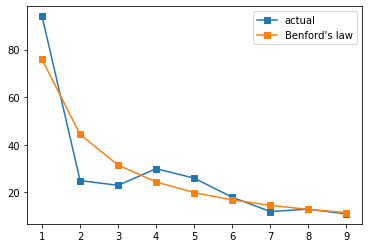

In [17]:
plt.plot(benfordslawtest(combinefs(AAPL))['index'], benfordslawtest(combinefs(AAPL))['actual'], marker = 's',label = 'actual')
plt.plot(benfordslawtest(combinefs(AAPL))['index'], benfordslawtest(combinefs(AAPL))['to_be'], marker = 's',label = "Benford's law")
plt.legend()

#### It turns out they are not well aligned with each other. Maybe because the sample size is too small. Anyway, the thing about Benford's law is that it still works when you multiply raw data with different scalars. Let's see if that is applicable in this situation.

In [18]:
def threetimes(json_data):
    mk = []
    for i in range(3):
        FS = combinefs(json_data)
        FS_mode = FS * (i+1)
        mk.append(benfordslawtest(FS_mode))
    return mk

In [19]:
threetimes(AAPL)[0]

,index,actual,to_be
0,1,94.0,75.859559
1,2,25.0,44.374997
2,3,23.0,31.484562
3,4,30.0,24.421323
4,5,26.0,19.953674
5,6,18.0,16.870591
6,7,12.0,14.613971
7,8,13.0,12.890436
8,9,11.0,11.530888


In [20]:
def showplot(json_data):
    plt.figure(figsize = (10,3))
    for i in range(3):    
        plt.subplot(131 + i)
        plt.plot(threetimes(json_data)[i]['index'], threetimes(json_data)[i]['actual'], marker = 's', label = 'actual')
        plt.plot(threetimes(json_data)[i]['index'], threetimes(json_data)[i]['to_be'], marker = 's',label = "Benford's law")
        plt.title('X{}'.format(i + 1))
        plt.legend()
    plt.suptitle("Benford's law test on FSs of {}".format(json_data['symbol']),fontsize=20,  y=1.1)


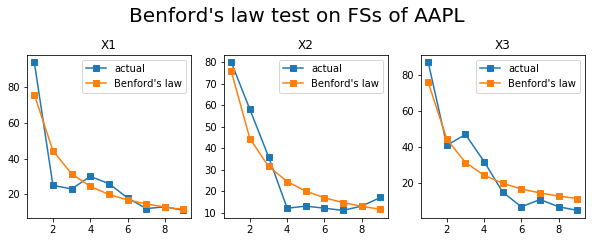

In [21]:
showplot(AAPL)

#### Again, it is kind of vague to tell if the numbers abide by the pattern. Better find a way to gain more sample size. Now let's see if it works in other company's financial statements.

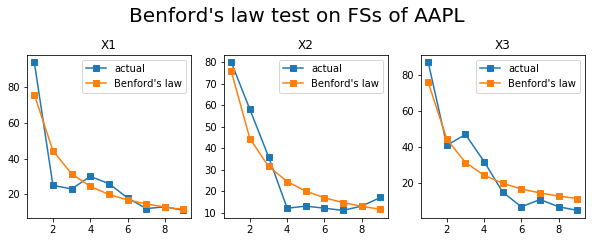

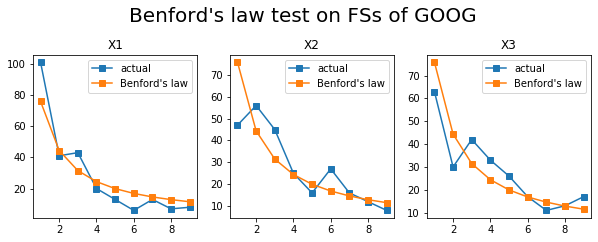

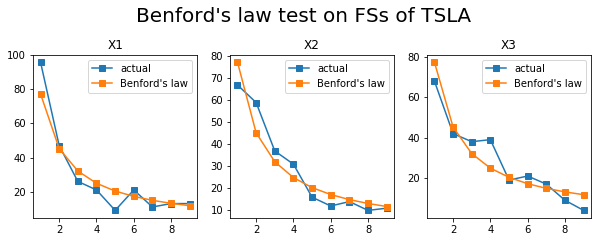

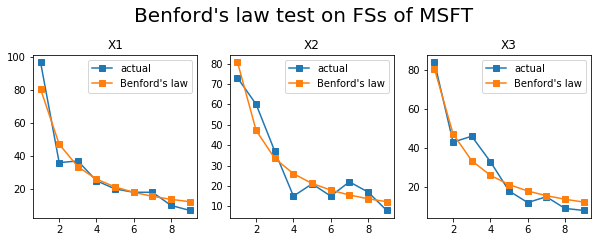

In [22]:
for i in [AAPL,GOOG,TSLA,MSFT]:
    showplot(i)